# Задача 2

Имеются следующие данные по группе предприятий о выпуске продукции (X, тыс.шт.) и себестоимости одного изделия (Y, руб.)

| x | 2,0 | 3,5 | 4,0 | 4,5 | 5,5 | 6,0 | 7,5 |
|---|-----|-----|-----|-----|-----|-----|-----|
| y | 1,8 | 1,7 | 1,8 | 1,5 | 1,6 | 1,4 | 1,2 |


- Вычислить коэффициент корреляции на основе этих данных. 
- При уровне значимости 0,05 проверить нулевую гипотезу H0 равенстве нулю коэффициента корреляции в генеральной совокупности. 
- Построить уравнение линейной регрессионной зависимости и объяснить его смысл. 
- Спрогнозировать среднюю себестоимость одного изделия при выпуске 6,5 тыс. шт.

## Решение

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

xi = np.array([2.0, 3.5, 4.0, 4.5, 5.5, 6.0, 7.5])
yi = np.array([1.8, 1.7, 1.8, 1.5, 1.6, 1.4, 1.2])

df = pd.DataFrame({
    "xi": xi,
    "yi": yi,
})

print(df)

    xi   yi
0  2.0  1.8
1  3.5  1.7
2  4.0  1.8
3  4.5  1.5
4  5.5  1.6
5  6.0  1.4
6  7.5  1.2


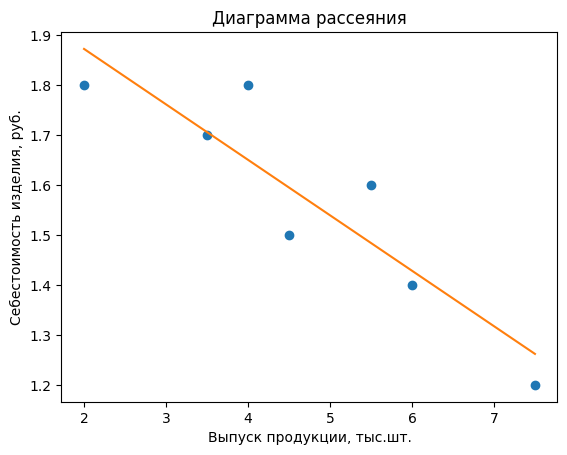

In [86]:
plt.title("Диаграмма рассеяния")
plt.xlabel("Выпуск продукции, тыс.шт.")
plt.ylabel("Себестоимость изделия, руб.")
plt.plot(df.xi, df.yi, 'o')
m, b0 = np.polyfit(df.xi, df.yi, 1)
plt.plot(df.xi, m*df.xi + b0) 
plt.show()

In [91]:
# Коэффициент корреляции

n = df.yi.count()

xy_mean = (df.xi * df.yi).sum() / n
x_mean = df.xi.mean()
y_mean = df.yi.mean()

x_var = ((df.xi - x_mean) ** 2).sum() / n 
x_std = math.sqrt(x_var)
y_var = ((df.yi - y_mean) ** 2).sum() / n
y_std = math.sqrt(y_var)

rxy = (xy_mean - x_mean * y_mean) / (x_std * y_std)

rxy_np = np.corrcoef(df.xi, df.yi)
assert(round(rxy,7) == round(rxy_np[0][1],7))

print(f"Коэффициент корреляции = {rxy:7.4f}")

Коэффициент корреляции = -0.9021


In [88]:
# Вычислим коэффициенты линейной регрессии y = ax + b

a = (rxy * y_std) / x_std
b = y_mean - a * x_mean

assert(round(a,7) == round(m, 7))
assert(round(b,7) == round(b0,7))

print(f"Уравнение регрессии: y = {a:7.4f} * x + {b:7.4f}")
print(f"C увеличением объема выпуска продукции на 1 тыс.шт. себестоимость уменьшается в среднем примерно на 11 копеек.")

Уравнение регрессии: y = -0.1110 * x +  2.0949
C увеличением объема выпуска продукции на 1 тыс.шт. себестоимость уменьшается в среднем примерно на 11 копеек.


In [89]:
z = 6.5
y_prog = a * z + b
print(f"При объеме выпуска {z:5.1f} тыс.шт. среднеожидаемое значение себестоимости составит {y_prog:5.2} руб.")

При объеме выпуска   6.5 тыс.шт. среднеожидаемое значение себестоимости составит   1.4 руб.


In [90]:
'''
Проверим значимость выборочного коэффициента корреляции r = -0.1110
Рассмотрим нулевую гипотезу H0: ro = 0 - генеральный линейный коэффициент корреляции равен нулю,
то есть себестоимость продукции не зависит от объема выпуска. 
'''

alpha = 0.05
k = n - 2 
t_ob = rxy * math.sqrt(k) / math.sqrt(1 - rxy ** 2)
print(f"Наблюдаемое значение t = {t_ob:7.4f}")

t_kr = stats.t.ppf(q = 1 - alpha / 2, df = k)
print(f"Область принятия гипотезы: {-t_kr:7.4f} < {t_ob:7.4f} < {t_kr:7.4f}")
print(f"Неравенство НЕ выполняется. Поэтому гипотезу H0 отвергаем.")
print(f"Выборочное значение r={rxy:7.4f} оказалось статически значимым.")


Наблюдаемое значение t = -4.6756
Область принятия гипотезы: -2.5706 < -4.6756 <  2.5706
Неравенство НЕ выполняется. Поэтому гипотезу H0 отвергаем.
Выборочное значение r=-0.9021 оказалось статически значимым.
